<a href="https://colab.research.google.com/github/Vijay06111998/Sentimental_Analysis_Tweets/blob/main/Sentiment_Analysis_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

In [17]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Overview

In [ ]:
data = pd.read_csv('Tweets.csv')

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
#Check for unique values
for col in data.columns:
    print(f'Unique values for {col}: {data[col].unique()}')

Unique values for tweet_id: [570306133677760513 570301130888122368 570301083672813571 ...
 569587242672398336 569587188687634433 569587140490866689]
Unique values for airline_sentiment: ['neutral' 'positive' 'negative']
Unique values for airline_sentiment_confidence: [1.     0.3486 0.6837 ... 0.6384 0.7094 0.3487]
Unique values for negativereason: [nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']
Unique values for negativereason_confidence: [   nan 0.     0.7033 ... 0.6234 0.644  0.7255]
Unique values for airline: ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']
Unique values for airline_sentiment_gold: [nan 'negative' 'neutral' 'positive']
Unique values for name: ['cairdin' 'jnardino' 'yvonnalynn' ... 'KristenReenders' 'itsropes'
 'sanyabun']
Unique values for negativereason_gold: [nan 'Late Flight\nFlight Attendant Compl

In [ ]:
#check for null values in our data
data.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


## Pre-Processing Data

In [ ]:
# convert 'tweet_created' to datetime and make sure it's in day format
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### 1. On which date we had maximum number of tweets?

## Dealing with Null Values

In [ ]:
date_counts = data.groupby('tweet_created')['tweet_id'].count()

#  maximum number of tweets
max_tweets_date = date_counts.idxmax()
print(f"The date with the maximum number of tweets is: {max_tweets_date}")

The date with the maximum number of tweets is: 2015-02-22


In [ ]:
# check for null value
data.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


**airline_sentiment_gold, negativereason_gold** have more than 99% missing data And **tweet_coord** have nearly 93% missing data. It will be better to delete these columns as they will not provide any meaningful information.

In [ ]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
data=data.drop(['airline_sentiment_gold', 'negativereason_gold','tweet_coord'], axis=1)

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


### 2. What is the biggest reason for having negative comments?

In [ ]:
negative_reasons = data[data['airline_sentiment'] == 'negative'].groupby('negativereason')['negativereason'].count()

# Find the most frequent negative reason
biggest_reason = negative_reasons.idxmax()
print(f"The biggest reason for negative comments is: {biggest_reason}")

The biggest reason for negative comments is: Customer Service Issue


## EDA
create plot for provided points.

### 1. Type of Sentiment by count

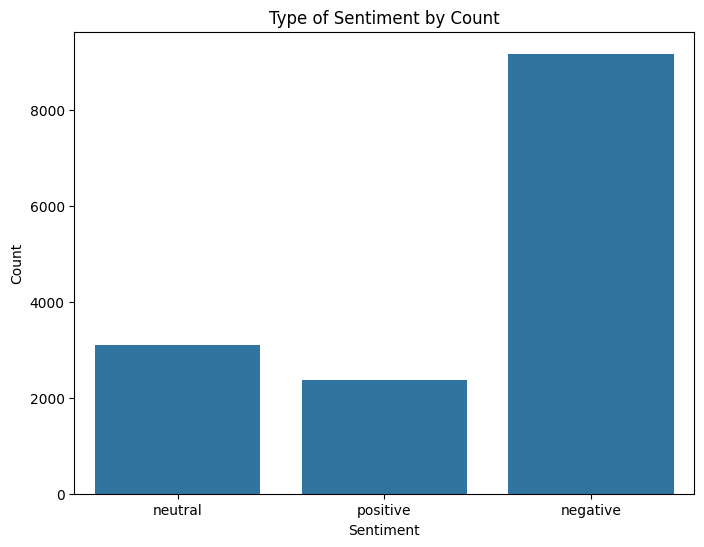

In [ ]:

# Plotting the sentiment counts
plt.figure(figsize=(8, 6))
sns.countplot(x='airline_sentiment', data=data)
plt.title('Type of Sentiment by Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### 2. Airline sentiments for each airline

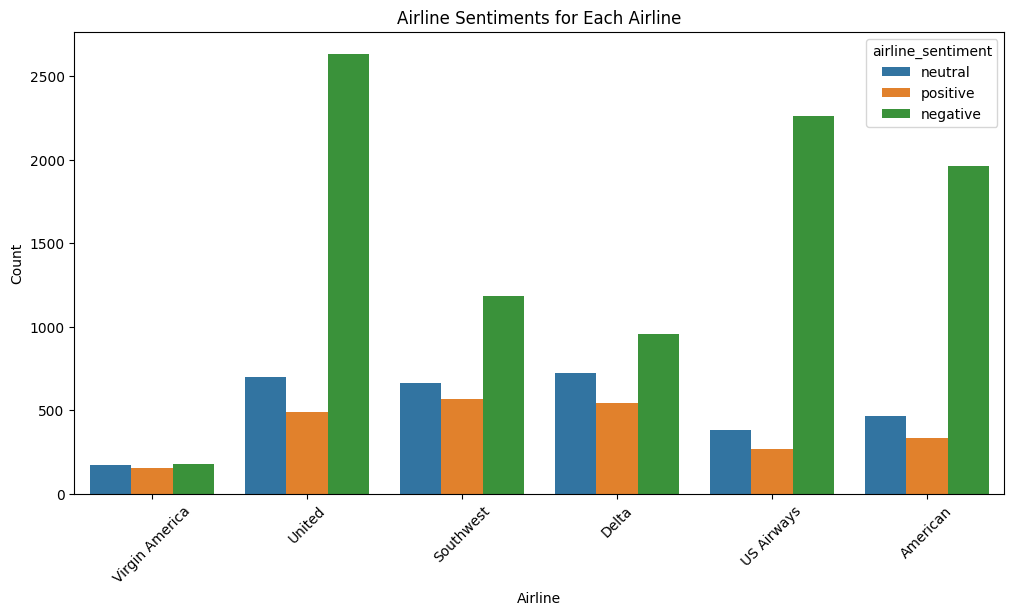

In [ ]:

# Plotting airline sentiments for each airline
plt.figure(figsize=(12, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=data)
plt.title('Airline Sentiments for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 3. Airlines by Negative sentiment

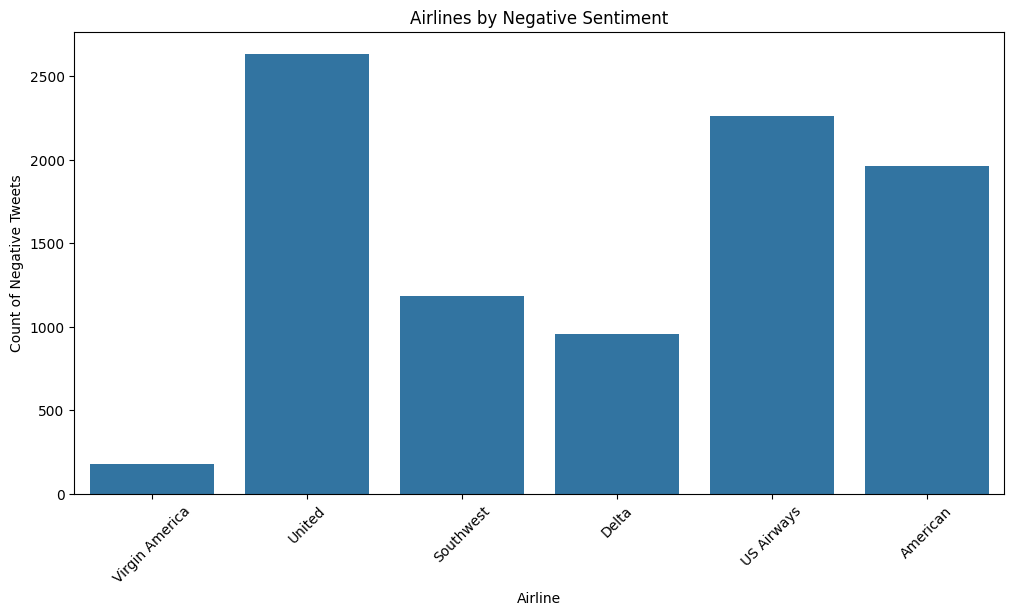

In [ ]:

# Plotting airlines by negative sentiment
plt.figure(figsize=(12, 6))
negative_tweets = data[data['airline_sentiment'] == 'negative']
sns.countplot(x='airline', data=negative_tweets)
plt.title('Airlines by Negative Sentiment')
plt.xlabel('Airline')
plt.ylabel('Count of Negative Tweets')
plt.xticks(rotation=45)
plt.show()

### 4. Airline by all sentiment

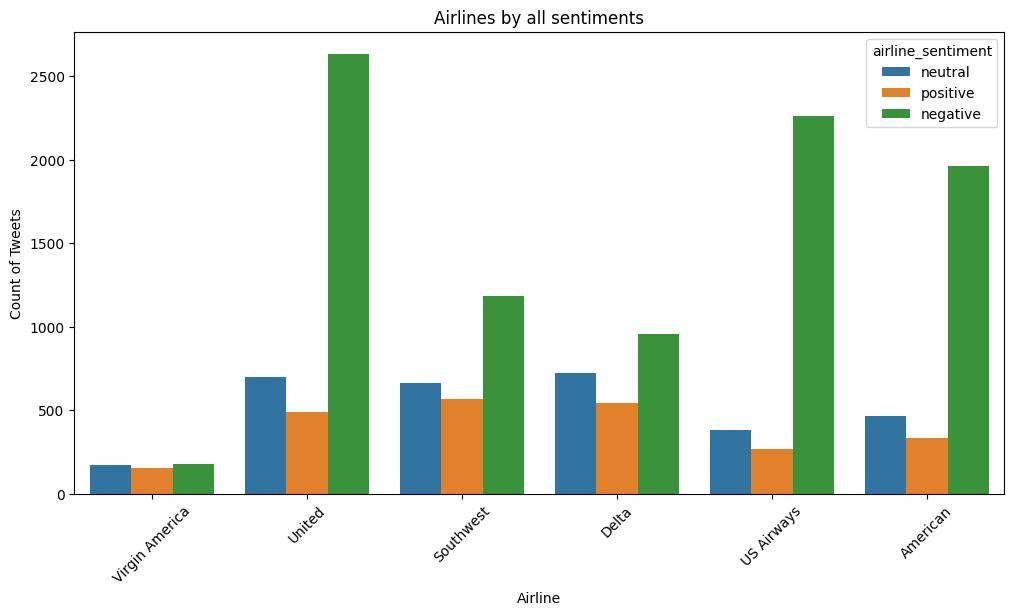

In [ ]:

# Plotting airlines by all sentiments
plt.figure(figsize=(12, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=data)
plt.title('Airlines by all sentiments')
plt.xlabel('Airline')
plt.ylabel('Count of Tweets')
plt.xticks(rotation=45)
plt.show()

### 5. Is there a relationship between negative sentiments and date?

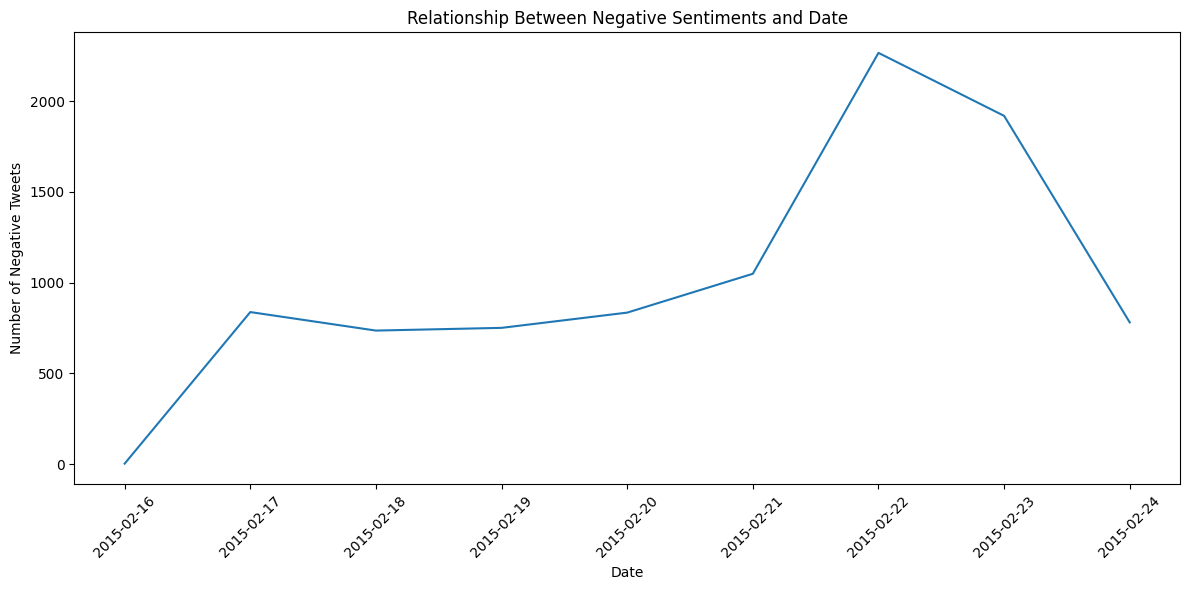

In [ ]:

# data by date and sentiment, then count the occurrences
sentiment_by_date = data.groupby(['tweet_created', 'airline_sentiment'])['tweet_id'].count().reset_index()

# Filter for negative sentiments
negative_sentiments = sentiment_by_date[sentiment_by_date['airline_sentiment'] == 'negative']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(negative_sentiments['tweet_created'], negative_sentiments['tweet_id'])
plt.xlabel('Date')
plt.ylabel('Number of Negative Tweets')
plt.title('Relationship Between Negative Sentiments and Date')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud,STOPWORDS

### Word cloud of Positive sentiment

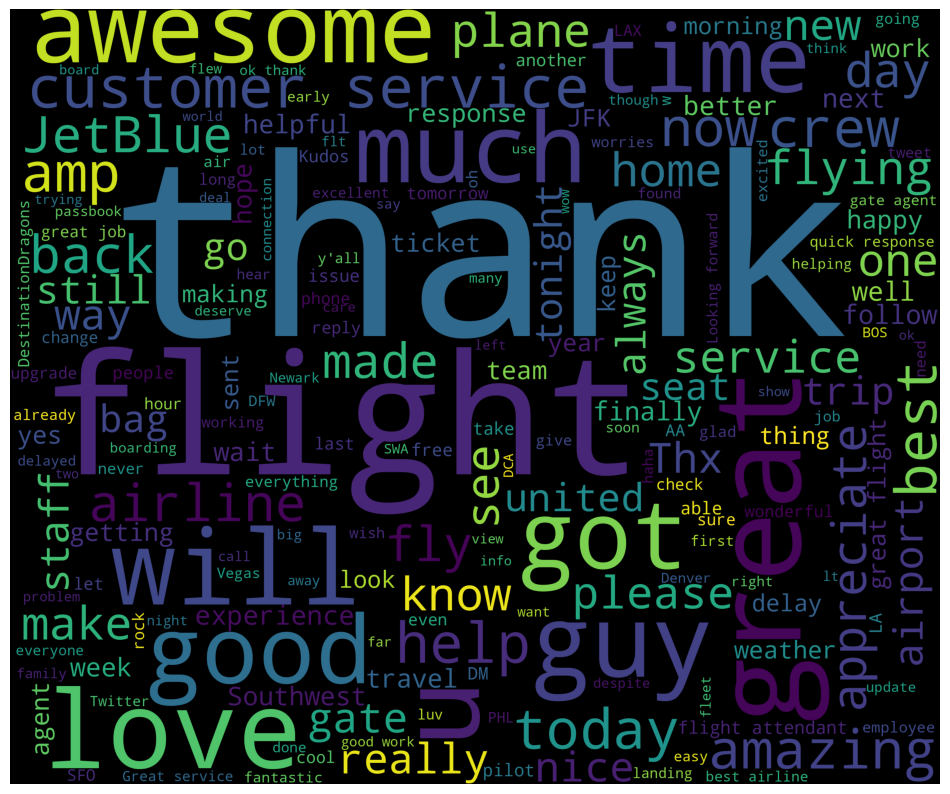

In [ ]:
new_df=data[data['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Word cloud of Negative sentiment

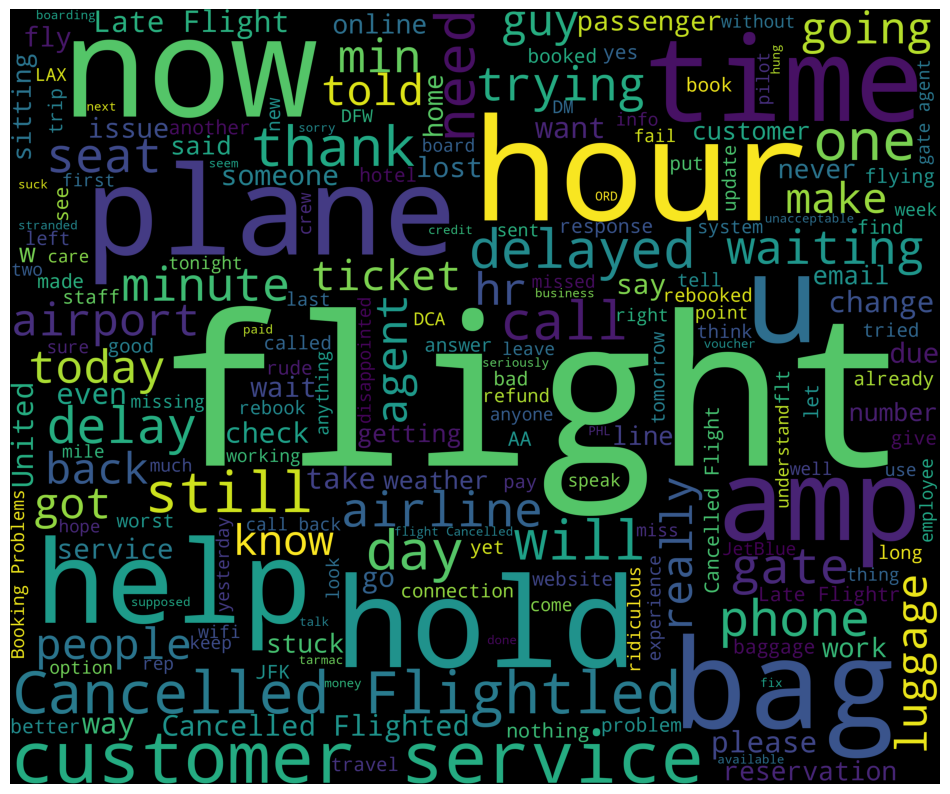

In [ ]:
new_df=data[data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Natural Language Processing

### Text Representation
- In Natural Language Processing (NLP) the conversion of raw-text to numerical form is called <b>Text Representation</b>
- This step is most important in the NLP pipeline because if we feed inappropriate data, our prediction will be useless.

If you have good `Text Represntation` and if you use any ordinary algorithm, you will get much better result then if you use highend APIs and algorithm with bad or poor `Text Representation`.


### Basic Text Pre-Processing

**1. Stop-Word Removal** : In English words like a, an, the, as, in, on, etc. are considered as stop-words so according to our requirements we can remove them to reduce vocabulary size as these words don't have some specific meaning

**2. Lower Casing** : Convert all words into the lower case because the upper or lower case may not make a difference for the problem.
And we are reducing vocabulary size by doing so.

**3. Stemming** : Stemming refers to the process of removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the same form (e.g., “walk” and “walking” are both reduced to “walk”).

**4. Tokenization** : NLP software typically analyzes text by breaking it up into words (tokens) and sentences.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download the required NLTK data packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download punkt_tab data package

text = "The quick brown fox jumps over the lazy dog."

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Tokenization (splitting into words)
tokens = word_tokenize(text)

# Preprocessing
processed_tokens = [stemmer.stem(word.lower())
                   for word in tokens
                   if word.lower() not in stop_words and word.isalnum()]

processed_text = " ".join(processed_tokens)
print(processed_text)  # Output: quick brown fox jump lazi dog

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


quick brown fox jump lazi dog


In [ ]:
df = data.copy()

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return text

names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']

# the words related the name of airlines are not relevant to the sentiment analysis
# Therefore I decided to append the above names into the list of stop words.
# you can also append any names in to the list for custom cleaning.

def clean_stopword(d):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])

def tokenize(d):
    return word_tokenize(d)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['final_text']= df.text.apply(clean_text).apply(clean_stopword).apply(tokenize)
df.final_text.head()

,final_text
0,"[dhepburn, said]"
1,"[plus, youve, added, commercials, experience, ..."
2,"[didnt, today, must, mean, need, take, another..."
3,"[really, aggressive, blast, obnoxious, enterta..."
4,"[really, big, bad, thing]"


In [ ]:
print(" ".join(df.final_text[0]),'\n')
print(" ".join(df.final_text[1]),'\n')
print(" ".join(df.final_text[100]),'\n')
print(" ".join(df.final_text[1000]),'\n')

dhepburn said 

plus youve added commercials experience tacky 

trying add boy prince ressie sf thursday lax httptcogsbjcgm 

put bag plane seattle waiting line talk someone bag status matter 



## Text Analysis

### Lexicon based approach (Easy way to find Sentiment)

The lexicon-based approach involves calculating orientation for a document from the semantic orientation of words or phrases in the document.it uses dictionaries of words annotated with the word's semantic orientation, or polarity.

Here we will just try to verify the lexicon works hopefully very well to classify the sentiment which has already been allocated by the real customers.

#### Vader

Vader is a lexicon made for the sentiment analysis of text data on social media.

It returns the compounded polarity score of a sentence after calculating the negative, the neutral, and the positive scores of each word in a sentence.

We can use Vader from the innner module in nltk as well as the Python API [vaderSentiment](https://pypi.org/project/vaderSentiment/).

VADER has many advantages over traditional sentiment analysis methods: [source](https://ichi.pro/ko/python-eseo-vaderleul-sayonghayeo-gamjeong-bunseog-dansunhwa-sosyeol-midieo-tegseuteu-274770204542255)

* **It works very well with social media type text**, but generalizes easily to multiple domains.
* It does not require any training data, but consists of a generalized, balence-based, human-curated gold standard psychological vocabulary.
* It's fast enough to use online with streaming data,
* The speed-performance trade-off isn't serious.



In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(" ".join(df.final_text[0]))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
texts = [" ".join(df.final_text[i]) for i in range(len(df))]

print(df.text[0])
print(texts[0])
print(vader.polarity_scores(texts[0]), f'--> Actual Classification: {df.airline_sentiment[0]}', '\n')

print(df.text[1])
print(texts[1])
print(vader.polarity_scores(texts[1]), f'--> Actual Classification: {df.airline_sentiment[1]}', '\n')

print(df.text[10])
print(texts[10])
print(vader.polarity_scores(texts[10]), f'--> Actual Classification: {df.airline_sentiment[10]}', '\n')

print(df.text[100])
print(texts[100])
print(vader.polarity_scores(texts[100]), f'--> Actual Classification: {df.airline_sentiment[100]}', '\n')


@VirginAmerica What @dhepburn said.
dhepburn said
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Actual Classification: neutral 

@VirginAmerica plus you've added commercials to the experience... tacky.
plus youve added commercials experience tacky
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Actual Classification: positive 

@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
know suicide second leading cause death among teens
{'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.8555} --> Actual Classification: neutral 

@VirginAmerica trying to add my boy Prince to my ressie. SF this Thursday @VirginAmerica from LAX http://t.co/GsB2J3c4gM
trying add boy prince ressie sf thursday lax httptcogsbjcgm
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} --> Actual Classification: neutral 



### Machine Learning approach

ML approach is also known as Document Classificaton. It uses ML algorithm to classify the text data.

The most important in ML approach is to convert the text to the vector or other numeric format to make the algorithms understand the text as a feature.


* Vectorization : `CountVectorizer`, `TfidfTransformer`, `Word2Vec`
* Model: Logistic Regression, RandomForest, SupportVectorMachine

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
df.final_text

,final_text
0,"[dhepburn, said]"
1,"[plus, youve, added, commercials, experience, ..."
2,"[didnt, today, must, mean, need, take, another..."
3,"[really, aggressive, blast, obnoxious, enterta..."
4,"[really, big, bad, thing]"
...,...
14635,"[thank, got, different, chicago]"
14636,"[leaving, minutes, late, warnings, communicati..."
14637,"[please, bring, blackberry]"
14638,"[money, change, dont, answer, phones, suggesti..."


In [ ]:
for i in range(len(df)):
    df['final_text'][i] = " ".join(df['final_text'][i])

Streaming output truncated to the last 5000 lines.
<ipython-input-50-81874cf7add1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_text'][i] = " ".join(df['final_text'][i])
<ipython-input-50-81874cf7add1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_text'][i] = " ".join(df['final_text'][i])
<ipython-input-50-81874cf7add1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_text'][i] = " ".join(df['final_

In [ ]:
df['final_text'][:3]

,final_text
0,dhepburn said
1,plus youve added commercials experience tacky
2,didnt today must mean need take another trip


In [ ]:
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [ ]:
X = df.final_text
y = df.airline_sentiment

In [ ]:
X.head()

,final_text
0,dhepburn said
1,plus youve added commercials experience tacky
2,didnt today must mean need take another trip
3,really aggressive blast obnoxious entertainmen...
4,really big bad thing


In [ ]:
y.head()

,airline_sentiment
0,1
1,2
2,1
3,0
4,0


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv('Tweets.csv')

# Extract features and target columns
X = data['text']  # Text column for input features
y = data['airline_sentiment']  # Target column

# Define models and their parameters
model_params = {'random_state': 42}
model_list = [
    LogisticRegression(**model_params, solver='liblinear'),
    RandomForestClassifier(**model_params),
    SVC(**model_params)
]
model_names = ['LogisticRegression', 'RandomForest', 'SupportVectorMachine']

# Initialize vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

# Cross-validation loop
for model, model_name in zip(model_list, model_names):
    for n_fold, (train_index, val_index) in enumerate(skf.split(X, y)):
        # Split data
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Apply CountVectorizer
        X_train_count = count_vectorizer.fit_transform(X_train)
        X_val_count = count_vectorizer.transform(X_val)

        # Train and predict using CountVectorizer
        model.fit(X_train_count, y_train)
        y_pred_count = model.predict(X_val_count)
        acc_count = accuracy_score(y_val, y_pred_count)

        # Apply TfidfVectorizer
        X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
        X_val_tfidf = tfidf_vectorizer.transform(X_val)

        # Train and predict using TfidfVectorizer
        model.fit(X_train_tfidf, y_train)
        y_pred_tfidf = model.predict(X_val_tfidf)
        acc_tfidf = accuracy_score(y_val, y_pred_tfidf)

        # Store results
        results.append([model_name, n_fold, 'CountVectorizer', acc_count])
        results.append([model_name, n_fold, 'TfidfVectorizer', acc_tfidf])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Fold', 'Vectorizer', 'Accuracy'])

# Display Results
print(results_df)

# Aggregated Results
print("\nAggregated Mean Accuracy:")
print(results_df.groupby(['Model', 'Vectorizer'])['Accuracy'].mean())


                   Model  Fold       Vectorizer  Accuracy
0     LogisticRegression     0  CountVectorizer  0.803962
1     LogisticRegression     0  TfidfVectorizer  0.793033
2     LogisticRegression     1  CountVectorizer  0.807377
3     LogisticRegression     1  TfidfVectorizer  0.792350
4     LogisticRegression     2  CountVectorizer  0.795765
5     LogisticRegression     2  TfidfVectorizer  0.797473
6     LogisticRegression     3  CountVectorizer  0.799522
7     LogisticRegression     3  TfidfVectorizer  0.787568
8     LogisticRegression     4  CountVectorizer  0.807719
9     LogisticRegression     4  TfidfVectorizer  0.801913
10          RandomForest     0  CountVectorizer  0.763661
11          RandomForest     0  TfidfVectorizer  0.751025
12          RandomForest     1  CountVectorizer  0.769467
13          RandomForest     1  TfidfVectorizer  0.763320
14          RandomForest     2  CountVectorizer  0.745560
15          RandomForest     2  TfidfVectorizer  0.737363
16          Ra

**bold text**#### CountVectorizer & TfidfVectorizer

#### Word2Vec

Word2Vec is one of the most popular model to represent a word in a large text corpus as a vector in n-dimensional space.

There are two kinds of W2V, Continuous Bag-of-Words(CBOW) and Skip-Gram.

Skip-gram is used to predict the context word for a given target word. It’s reverse of CBOW algorithm. Here, target word is input while context words are output.

In most case it is known that the predictability of skip-gram is better than the one of CBOW.

We can use `Word2Vec` library from `gensim` and set the option `sg` which is the abbreviation of skip-gram.

In [ ]:
!pip install gensim

In [11]:
print(data.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [12]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Tokenization function
def tokenize(text):
    return word_tokenize(text.lower())  # Lowercase for consistency

# Apply tokenization to 'text' column
texts_w2v = data['text'].dropna().apply(tokenize).to_list()  # Ensure no missing values

# Train Word2Vec model using Skip-gram
w2v = Word2Vec(
    sentences=texts_w2v,
    window=3,
    vector_size=100,
    min_count=5,
    workers=4,
    sg=1
)

# Fetch the embedding for the word 'airline'
word = 'airline'
if word in w2v.wv:
    embedding = w2v.wv[word]
    print(f"Vector for '{word}':\n{embedding}")
else:
    print(f"The word '{word}' is not in the vocabulary.")


Vector for 'airline':
[-0.2631248  -0.12434877  0.09513712  0.0949834  -0.3549508  -0.16767697
 -0.01958132 -0.07882523 -0.06562737 -0.29587442 -0.10937925 -0.02120386
 -0.4220221   0.13623646 -0.09499261 -0.40954798 -0.29844335 -0.2596083
 -0.01363446 -0.7595555  -0.25797108  0.39531928  0.4152482   0.2542566
 -0.02875472  0.05667763  0.06811066  0.13871361 -0.0634698   0.13792165
  0.2627819  -0.404192    0.405088    0.08359976 -0.453868    0.15475832
  0.2571618  -0.50580084 -0.08797251 -0.17593302 -0.03635585 -0.29621223
 -0.18563963  0.12321252  0.11742473  0.24171431 -0.11758541 -0.501456
  0.14577739  0.13096592  0.35521305 -0.12688182  0.17897938 -0.18070099
  0.20779526  0.2423678   0.029443   -0.10195398 -0.06166561  0.19696139
 -0.11697809 -0.35679066 -0.38238102 -0.15470225 -0.36954463 -0.1893297
 -0.03567592  0.04145491 -0.3053577   0.7113631  -0.5573201   0.16546784
  0.05923906 -0.06215902 -0.08319404 -0.31244135  0.03846289  0.23209755
 -0.1298182  -0.13844968 -0.063535

In [14]:
texts_w2v[:3]

[['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.'],
 ['@',
  'virginamerica',
  'plus',
  'you',
  "'ve",
  'added',
  'commercials',
  'to',
  'the',
  'experience',
  '...',
  'tacky',
  '.'],
 ['@',
  'virginamerica',
  'i',
  'did',
  "n't",
  'today',
  '...',
  'must',
  'mean',
  'i',
  'need',
  'to',
  'take',
  'another',
  'trip',
  '!']]

<br>

`Word2Vec` imported from `gensim` trains the texts at the same time as it is declared by the user.

We can find the similar words with the given word and the examples are represented below.

<br>

In [15]:
w2v.wv.most_similar('thank')

[('thx', 0.8405838012695312),
 ('quick', 0.8263404965400696),
 ('thanks', 0.820427656173706),
 ('rock', 0.7872242331504822),
 ('responding', 0.761079728603363),
 ('prompt', 0.7558755874633789),
 ('suck', 0.75423264503479),
 ('dmed', 0.7428414821624756),
 ('appreciate', 0.7404165267944336),
 ('wow', 0.727364182472229)]

In [16]:
w2v.wv.most_similar('customerservice')

[('neveragain', 0.9716007113456726),
 ('americanairlines', 0.9605522155761719),
 ('badservice', 0.9501810669898987),
 ('fail', 0.9484641551971436),
 ('usairwaysfail', 0.9445169568061829),
 ('badcustomerservice', 0.938132643699646),
 ('unitedairlines', 0.9307144284248352),
 ('poorservice', 0.9224576354026794),
 ('nothappy', 0.9224086403846741),
 ('thankyou', 0.9121578931808472)]